In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("segmentation data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [4]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


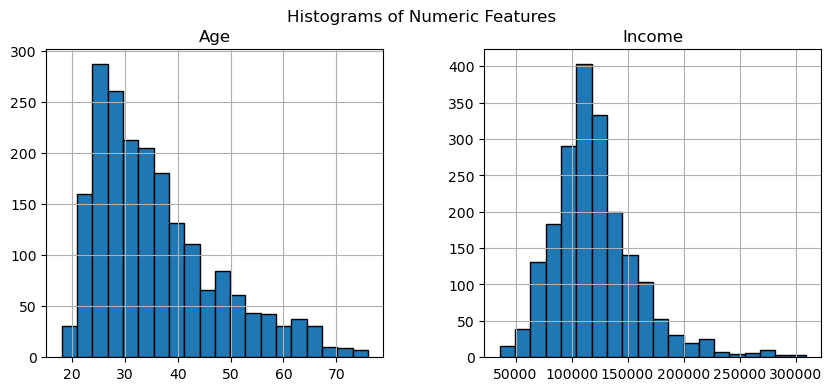

In [8]:
# define columns properly 
num_cols = ['Age', 'Income']
cal_cols = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

# HISTOGRAMS for numeric
data[num_cols].hist(figsize=(10, 4), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()

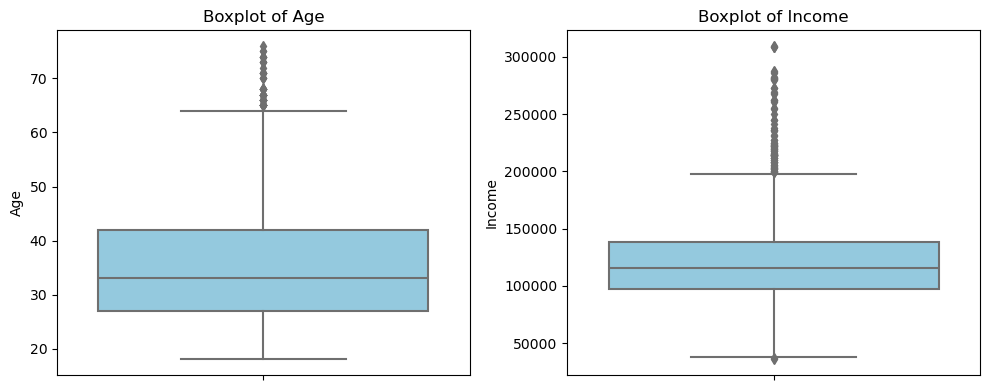

In [9]:
# Boxplot for numeric
plt.figure(figsize=(10, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,2,i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

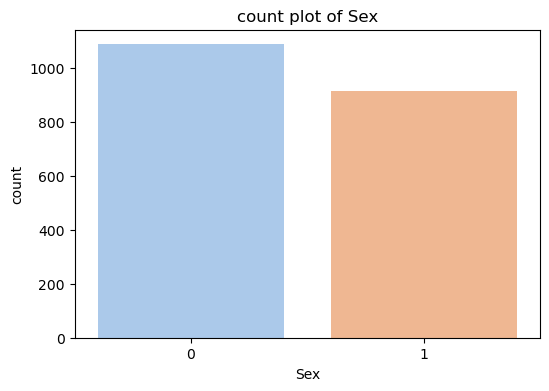

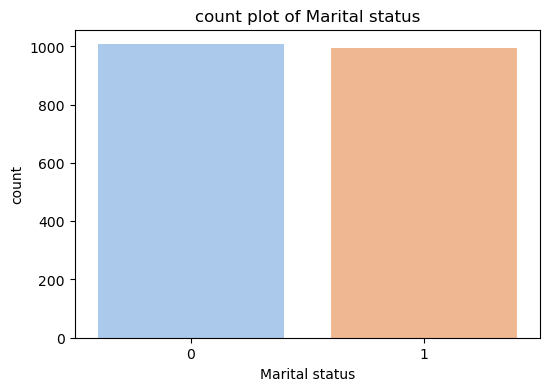

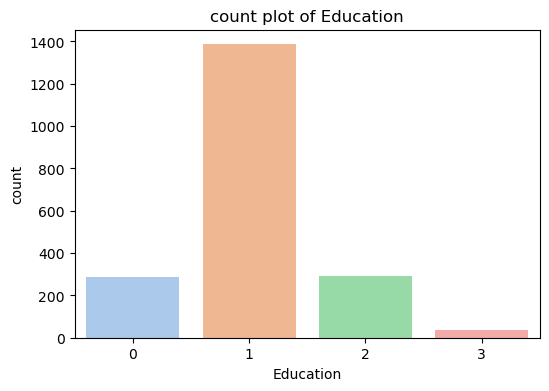

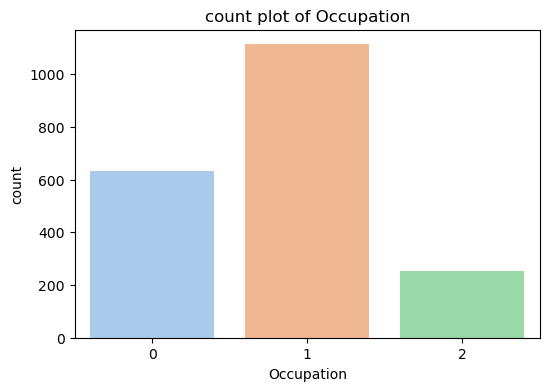

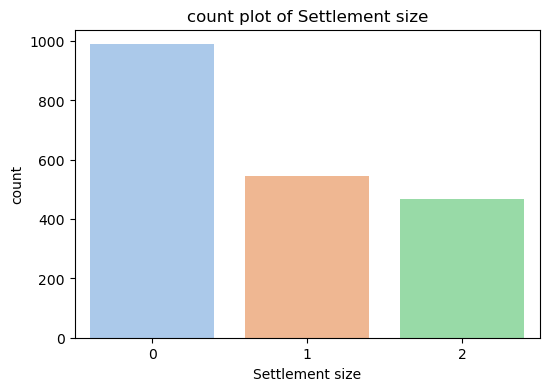

In [11]:
# Countplots for categorical 
for col in cal_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[col], palette='pastel')
    plt.title(f'count plot of {col}')
    plt.show

Correlation Matrix:
            Age   Income
Age     1.00000  0.34061
Income  0.34061  1.00000


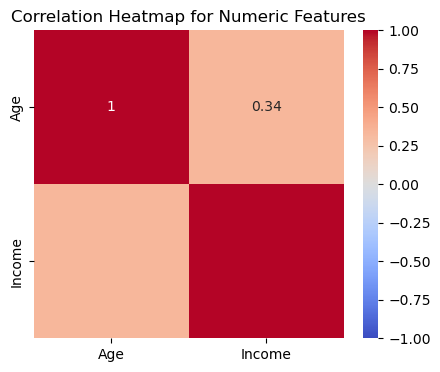

In [13]:
# Compute correlation matrix for numeric features
corr_matrix = data[num_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

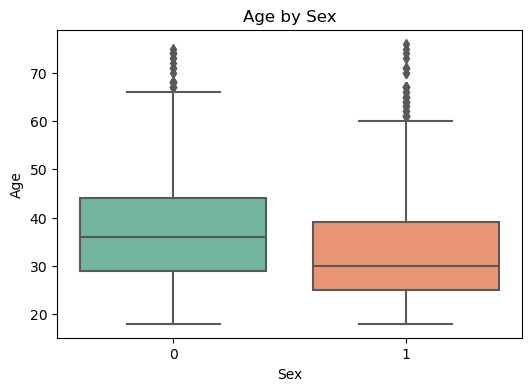

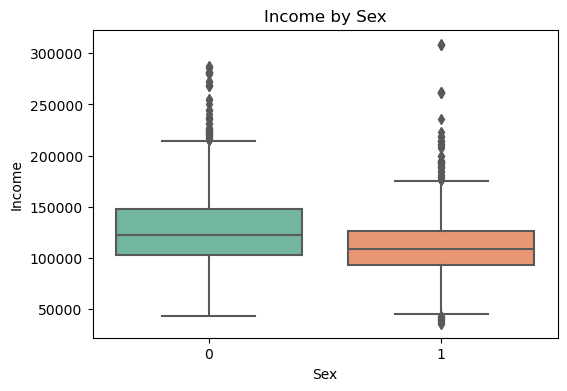

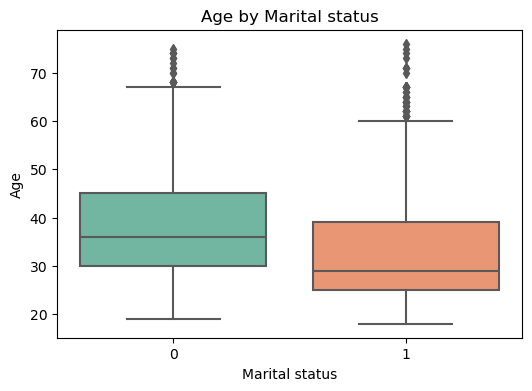

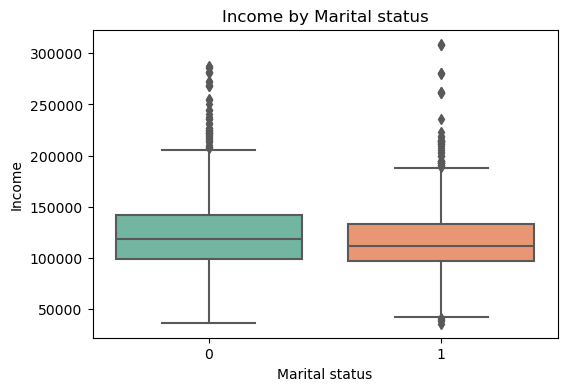

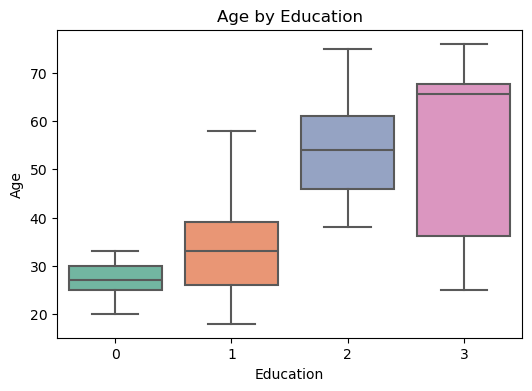

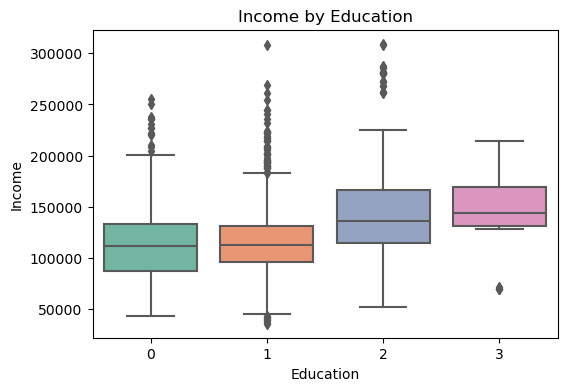

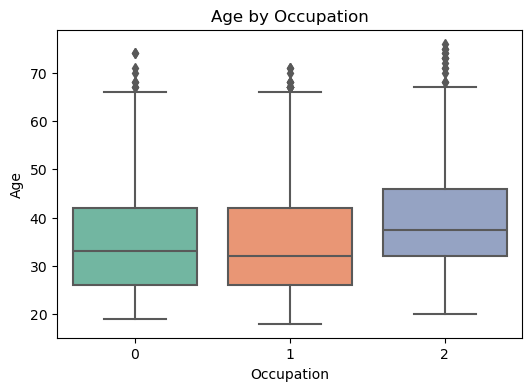

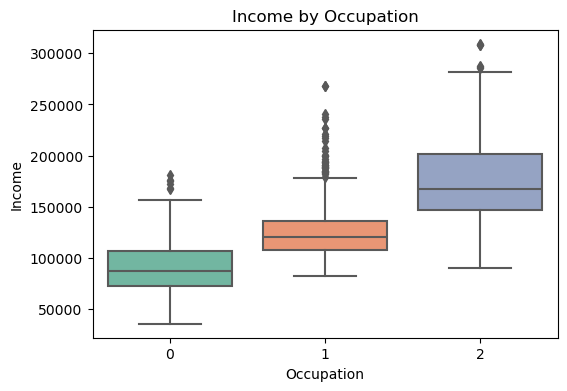

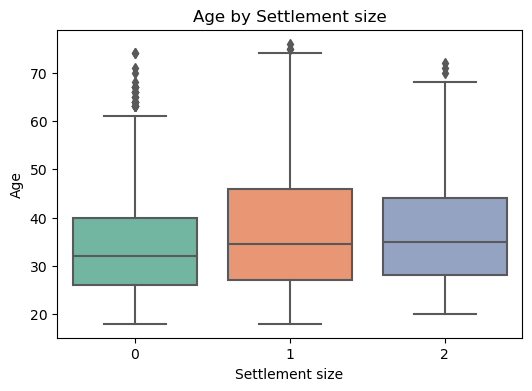

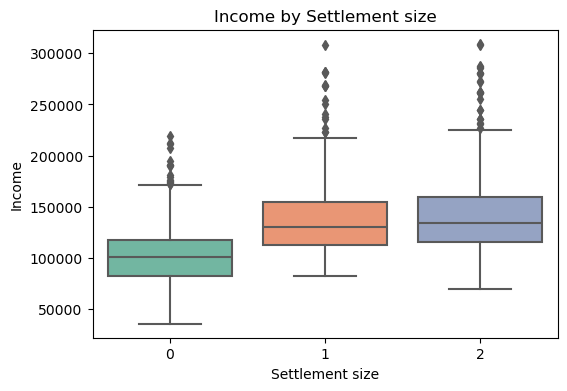

In [16]:
# Boxplots: numeric vs categorical 
for cat in cal_cols:
    for num in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=data[cat], y=data[num], palette='Set2')
        plt.title(f'{num} by {cat}')
        plt.show()

In [29]:
# Check current columns
print(data.columns.tolist())

# Strip spaces if any
data.columns = data.columns.str.strip()



['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']


In [28]:


# define columns 
num_features = ['Age', 'Income']
cat_features = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

# create transformers
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')

# create a full preprocessor 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# apply transformations 
x_pred = preprocessor.fit_transform(data)

print("✅ Preprocessing done.")
print("Shape after preprocessing:", x_pred.shape)

✅ Preprocessing done.
Shape after preprocessing: (2000, 11)


In [36]:
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_pred)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.41218345 0.20292977 0.1066387  0.0830449  0.06452884 0.05683245
 0.03169725]


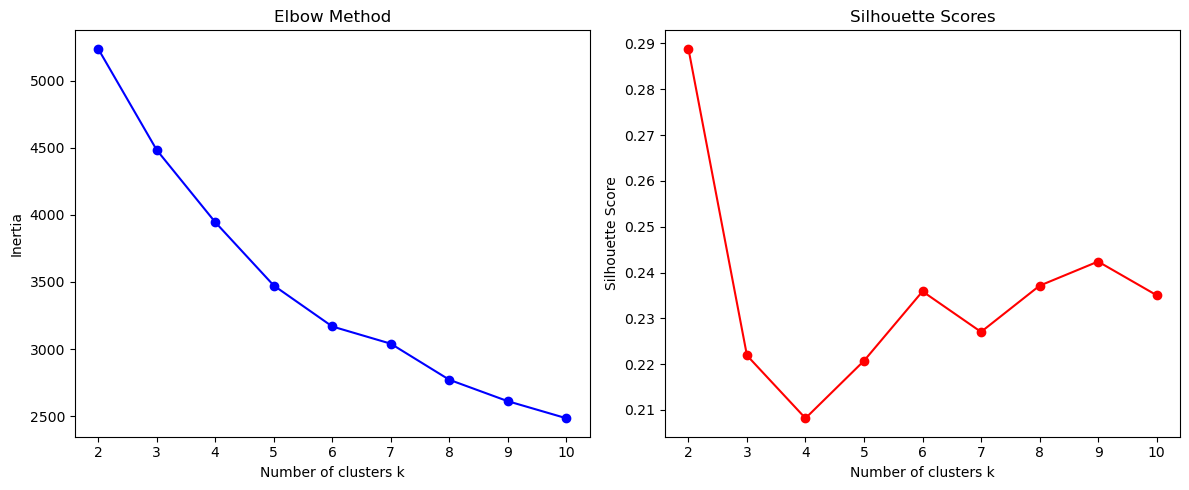

In [45]:
inertia = []
silhouette = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state= 23)
    kmeans.fit(x_pred)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(x_pred, kmeans.labels_))

# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()

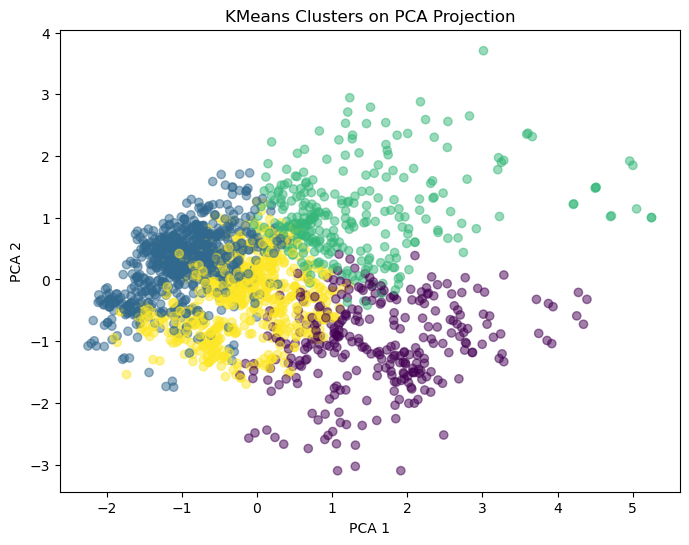

In [46]:
# Fit final model
kmeans = KMeans(n_clusters=4, random_state=23)
labels = kmeans.fit_predict(x_pred)

# Plot clusters on PCA
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clusters on PCA Projection')
plt.show()


In [47]:
# Add labels
data['Cluster'] = labels

# See summary stats per cluster
print(data.groupby('Cluster').mean())


              Sex  Marital status        Age  Education         Income  \
Cluster                                                                  
0        0.520134        0.610738  56.020134   1.986577  134900.419463   
1        0.809906        0.923695  27.483266   1.000000  104048.867470   
2        0.174061        0.327645  37.764505   1.017065  181050.546075   
3        0.155589        0.037764  35.542296   0.663142  107154.379154   

         Occupation  Settlement size  
Cluster                               
0          0.795302         0.798658  
1          0.662651         0.515395  
2          1.614334         1.477816  
3          0.628399         0.637462  
